#What is Categorical Encoding?
Typically, any structured dataset includes multiple columns – a combination of numerical as well as categorical variables. A machine can only understand the numbers. It cannot understand the text. That’s essentially the case with Machine Learning algorithms too.


https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/external-content.duckduckgo.com_.jpeg

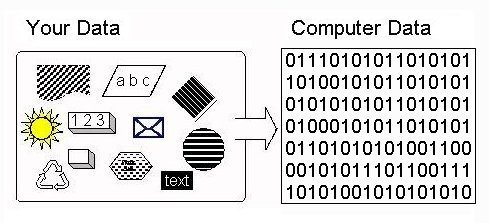

###Categorical encoding is the process of converting categorical columns to numerical columns so that a machine learning algorithm understands it. It is a process of converting categories to numbers.

 I will discuss the two most widely used techniques:

##Label Encoding

##One-Hot Encoding

In [2]:

#importing the libraries
import pandas as pd
import numpy as np

#reading the dataset
df=pd.read_csv("/content/salary.csv")
df

,country,age,salary
0,india,44.0,75000.0
1,us,34.0,26000.0
2,japan,46.0,46000.0
3,us,35.0,12000.0
4,japan,23.0,47000.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [3]:
df = df.dropna(axis=0) # drop all nan rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  5 non-null      object 
 1   age      5 non-null      float64
 2   salary   5 non-null      float64
dtypes: float64(2), object(1)
memory usage: 160.0+ bytes


In [4]:
data = df

In [5]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'.
data['country']= label_encoder.fit_transform(data['country'])
data.head()

<ipython-input-5-0d8ea08c63d2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['country']= label_encoder.fit_transform(data['country'])


,country,age,salary
0,0,44.0,75000.0
1,2,34.0,26000.0
2,1,46.0,46000.0
3,2,35.0,12000.0
4,1,23.0,47000.0


###As you can see here, label encoding uses alphabetical ordering. Hence, India has been encoded with 0, the US with 2, and Japan with 1.

#Challenges with Label Encoding
In the above scenario, the Country names do not have an order or rank. But, when label encoding is performed, the country names are ranked based on the alphabets. Due to this, there is a very high probability that the model captures the relationship between countries such as India < Japan < the US.

#What is One Hot Encoding?
One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature. One-Hot Encoding is the process of creating dummy variables.

In [6]:
data.shape

(5, 3)

In [7]:
data.country.values

array([0, 2, 1, 2, 1])

In [8]:
data.country.values.shape

(5,)

In [9]:
data.country.values.reshape(-1,1)

array([[0],
       [2],
       [1],
       [2],
       [1]])

In [10]:
# importing one hot encode
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object
X = onehotencoder.fit_transform(data.country.values.reshape(-1,1)).toarray()
X

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [11]:
data.shape

(5, 3)

In [12]:
data.shape[1]

3

In [13]:
#To add this back into the original dataframe
dfOneHot = pd.DataFrame(X, columns = ["country_"+str(int(i)) for i in range(data.shape[1])])
dfOneHot

,country_0,country_1,country_2
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [14]:
df

,country,age,salary
0,0,44.0,75000.0
1,2,34.0,26000.0
2,1,46.0,46000.0
3,2,35.0,12000.0
4,1,23.0,47000.0


In [15]:
df = pd.concat([data, dfOneHot], axis=1)
df

,country,age,salary,country_0,country_1,country_2
0,0,44.0,75000.0,1.0,0.0,0.0
1,2,34.0,26000.0,0.0,0.0,1.0
2,1,46.0,46000.0,0.0,1.0,0.0
3,2,35.0,12000.0,0.0,0.0,1.0
4,1,23.0,47000.0,0.0,1.0,0.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    5 non-null      int64  
 1   age        5 non-null      float64
 2   salary     5 non-null      float64
 3   country_0  5 non-null      float64
 4   country_1  5 non-null      float64
 5   country_2  5 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 280.0 bytes


In [17]:
#droping the country column
df= df.drop(['country'], axis=1)
#printing to verify
df.head()

,age,salary,country_0,country_1,country_2
0,44.0,75000.0,1.0,0.0,0.0
1,34.0,26000.0,0.0,0.0,1.0
2,46.0,46000.0,0.0,1.0,0.0
3,35.0,12000.0,0.0,0.0,1.0
4,23.0,47000.0,0.0,1.0,0.0


#Challenges of One-Hot Encoding: Dummy Variable Trap
One-Hot Encoding results in a Dummy Variable Trap as the outcome of one variable can easily be predicted with the help of the remaining variables. Dummy Variable Trap is a scenario in which variables are highly correlated to each other.

The Dummy Variable Trap leads to the problem known as multicollinearity. Multicollinearity occurs where there is a dependency between the independent features. Multicollinearity is a serious issue in machine learning models like Linear Regression and Logistic Regression.

So, in order to overcome the problem of multicollinearity, one of the dummy variables has to be dropped. Here, I will practically demonstrate how the problem of multicollinearity is introduced after carrying out the one-hot encoding.

One of the common ways to check for multicollinearity is the Variance Inflation Factor (VIF):

##VIF=1, Very Less Multicollinearity
##VIF<5, Moderate Multicollinearity
##VIF>5, Extreme Multicollinearity (This is what we have to avoid)

Compute the VIF scores:

In [18]:
x_var_names = data.columns
print(x_var_names)
x_var_names.shape[0]

Index(['country', 'age ', 'salary'], dtype='object')


3

In [19]:
data

,country,age,salary
0,0,44.0,75000.0
1,2,34.0,26000.0
2,1,46.0,46000.0
3,2,35.0,12000.0
4,1,23.0,47000.0


In [20]:
data['country']

0    0
1    2
2    1
3    2
4    1
Name: country, dtype: int64

In [21]:
import statsmodels.api as sm

# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

X=df.drop(['salary'],axis=1)
calculate_vif(X)

,Var,Vif
2,country_1,9.98
3,country_2,9.98
1,country_0,8.31
0,age,1.27


###From the output, we can see that the dummy variables which are created using one-hot encoding have VIF above 5. We have a multicollinearity problem.

Now, let us drop one of the dummy variables to solve the multicollinearity issue:

In [22]:
df.columns

Index(['age ', 'salary', 'country_0', 'country_1', 'country_2'], dtype='object')

In [23]:
df

,age,salary,country_0,country_1,country_2
0,44.0,75000.0,1.0,0.0,0.0
1,34.0,26000.0,0.0,0.0,1.0
2,46.0,46000.0,0.0,1.0,0.0
3,35.0,12000.0,0.0,0.0,1.0
4,23.0,47000.0,0.0,1.0,0.0


In [24]:
df = df.drop(df.columns[[0]], axis=1)
print(df)
calculate_vif(df)

    salary  country_0  country_1  country_2
0  75000.0        1.0        0.0        0.0
1  26000.0        0.0        0.0        1.0
2  46000.0        0.0        1.0        0.0
3  12000.0        0.0        0.0        1.0
4  47000.0        0.0        1.0        0.0


,Var,Vif
1,country_0,58.11
2,country_1,44.90
0,salary,23.18
3,country_2,8.33


###Wow! VIF has decreased. We solved the problem of multicollinearity. Now, the dataset is ready for building the model.

#One-Hot Encoding
Description	Converts each categorical value into a binary vector, creating new binary columns for each category.

Example	Original category: “Red”
Encoded: [1, 0, 0]

Example	Original category: “Green”
Encoded: [0, 1, 0]

Example	Original category: “Blue”
Encoded: [0, 0, 1]

#Label Encoding
Assigns a unique numerical label to each category, preserving the ordinal relationship if present.

Original category: “Red”

Encoded: 1

Original category: “Green”

Encoded: 2

Original category: “Blue”

Encoded: 3



#When to use a Label Encoding vs. One Hot Encoding
This question generally depends on your dataset and the model which you wish to apply. But still, a few points to note before choosing the right encoding technique for your model:

###We apply One-Hot Encoding when:
The categorical feature is not ordinal (like the countries above)
The number of categorical features is less so one-hot encoding can be effectively applied.

###We apply Label Encoding when:

The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
The number of categories is quite large as one-hot encoding can lead to high memory consumption.




#Label Encoding vs One Hot Encoding vs Ordinal Encoding

#Label Encoding:
 Label encoding assigns a unique numerical label to each category in a categorical variable. It **preserves the ordinal relationship between categories if present.** For example, “Red” may be encoded as 1, “Green” as 2, and “Blue” as 3.

#One-Hot Encoding:
 One-hot encoding converts each category in a categorical variable into a binary vector. It creates new binary columns for each category, representing the presence or absence of the category. Each category is mutually exclusive. For example, “Red” may be encoded as [1, 0, 0], “Green” as [0, 1, 0], and “Blue” as [0, 0, 1].

#Ordinal Encoding:
 Ordinal encoding is similar to label encoding but considers the order or rank of categories. It assigns **unique numerical labels to each category,** preserving the ordinal relationship between categories. For example, “Cold” may be encoded as 1, “Warm” as 2, and “Hot” as 3.

#Q1. What is better, label encoding or one-hot encoding?
A. Label encoding and one-hot encoding are methods for handling categorical variables in machine learning. The choice between them depends on the specific dataset and the ML algorithm you use.

#Q2. Why not use label encoding?
A. Label encoding is simpler and more space-efficient, but it may introduce an arbitrary order to categorical values. One-hot encoding avoids this issue by creating binary columns for each category, but it can lead to high-dimensional data.

#Q3. What is the difference between target encoding vs label encoding?
A. Target encoding uses the target variable to encode categorical features, while label encoding assigns unique labels to each category. Target encoding can capture target-related information but may introduce data leakage and overfitting risks.

#One-Hot Encoding Using Python

In [25]:
# Program for demonstration of one hot encoding

# import libraries
import numpy as np
import pandas as pd

# import the data required
data = pd.read_csv('/content/employee.csv')
data.head()

,Employee_ID,Gender,Remarks
0,45,male,nice
1,78,female,good
2,56,female,great
3,12,male,great
4,7,female,nice


In [26]:
data['Gender'].unique()

array(['male', 'female'], dtype=object)

In [27]:
data['Remarks'].unique()

array(['nice', 'good', 'great'], dtype=object)

In [28]:
data['Gender'].value_counts()


female    3
male      2
Name: Gender, dtype: int64

In [29]:
data['Remarks'].value_counts()

nice     2
great    2
good     1
Name: Remarks, dtype: int64

In [30]:
#One-Hot Encoding of Categorical Column Using Pandas library
one_hot_encoded_data = pd.get_dummies(data, columns = ['Remarks', 'Gender'])
one_hot_encoded_data

,Employee_ID,Remarks_good,Remarks_great,Remarks_nice,Gender_female,Gender_male
0,45,0,0,1,0,1
1,78,1,0,0,1,0
2,56,0,1,0,1,0
3,12,0,1,0,0,1
4,7,0,0,1,1,0


#One Hot Encoding using Sci-kit Learn Library


In [31]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Retrieving data
data = pd.read_csv('/content/employee.csv')
data.head()

,Employee_ID,Gender,Remarks
0,45,male,nice
1,78,female,good
2,56,female,great
3,12,male,great
4,7,female,nice


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Employee_ID  5 non-null      int64 
 1   Gender       5 non-null      object
 2   Remarks      5 non-null      object
dtypes: int64(1), object(2)
memory usage: 248.0+ bytes


In [33]:
# Converting type of columns to category
data['Gender'] = data['Gender'].astype('category')
data['Remarks'] = data['Remarks'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Employee_ID  5 non-null      int64   
 1   Gender       5 non-null      category
 2   Remarks      5 non-null      category
dtypes: category(2), int64(1)
memory usage: 434.0 bytes


In [34]:
# Assigning numerical values and storing it in another columns
data['Gen_new'] = data['Gender'].cat.codes
data['Rem_new'] = data['Remarks'].cat.codes

data.head()

,Employee_ID,Gender,Remarks,Gen_new,Rem_new
0,45,male,nice,1,2
1,78,female,good,0,0
2,56,female,great,0,1
3,12,male,great,1,1
4,7,female,nice,0,2


In [35]:
# Create an instance of One-hot-encoder
enc = OneHotEncoder()

# Passing encoded columns

enc_data = pd.DataFrame(enc.fit_transform(
    data[['Gen_new', 'Rem_new']]).toarray())

enc_data

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0


In [36]:
# Merge with main
New_df = data.join(enc_data)

New_df

,Employee_ID,Gender,Remarks,Gen_new,Rem_new,0,1,2,3,4
0,45,male,nice,1,2,0.0,1.0,0.0,0.0,1.0
1,78,female,good,0,0,1.0,0.0,1.0,0.0,0.0
2,56,female,great,0,1,1.0,0.0,0.0,1.0,0.0
3,12,male,great,1,1,0.0,1.0,0.0,1.0,0.0
4,7,female,nice,0,2,1.0,0.0,0.0,0.0,1.0


In [37]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Retrieving data
data = pd.read_csv('/content/employee.csv')
data.head()

,Employee_ID,Gender,Remarks
0,45,male,nice
1,78,female,good
2,56,female,great
3,12,male,great
4,7,female,nice


In [38]:
# Create an instance of One-hot-encoder
enc = OneHotEncoder()

# Passing encoded columns

enc_data1 = pd.DataFrame(enc.fit_transform(
    data[['Gender', 'Remarks']]).toarray())

enc_data1

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0


In [39]:
# Merge with main
New_df1 = data.join(enc_data1)

New_df1

,Employee_ID,Gender,Remarks,0,1,2,3,4
0,45,male,nice,0.0,1.0,0.0,0.0,1.0
1,78,female,good,1.0,0.0,1.0,0.0,0.0
2,56,female,great,1.0,0.0,0.0,1.0,0.0
3,12,male,great,0.0,1.0,0.0,1.0,0.0
4,7,female,nice,1.0,0.0,0.0,0.0,1.0


In [40]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Retrieving data
data = pd.read_csv('/content/employee.csv')
data.head()

,Employee_ID,Gender,Remarks
0,45,male,nice
1,78,female,good
2,56,female,great
3,12,male,great
4,7,female,nice


In [41]:
# importing one hot encode
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object
X1 = onehotencoder.fit_transform(data.Gender.values.reshape(-1,1)).toarray()
X1

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [42]:
import numpy as np

len(data['Gender'].unique())

2

In [43]:
len(data['Remarks'].unique())

3

In [44]:
#To add this back into the original dataframe
dfOneHot1 = pd.DataFrame(X1, columns = ["Gender_"+str(int(i)) for i in range(len(data['Gender'].unique()))])
dfOneHot1

,Gender_0,Gender_1
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


In [45]:
# importing one hot encode
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object
X2 = onehotencoder.fit_transform(data.Remarks.values.reshape(-1,1)).toarray()
X2

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [46]:
#To add this back into the original dataframe
dfOneHot2 = pd.DataFrame(X2, columns = ["Remarks_"+str(int(i)) for i in range(len(data['Remarks'].unique()))])
dfOneHot2

,Remarks_0,Remarks_1,Remarks_2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [47]:
df = pd.concat([data, dfOneHot1,dfOneHot2 ], axis=1)
df

,Employee_ID,Gender,Remarks,Gender_0,Gender_1,Remarks_0,Remarks_1,Remarks_2
0,45,male,nice,0.0,1.0,0.0,0.0,1.0
1,78,female,good,1.0,0.0,1.0,0.0,0.0
2,56,female,great,1.0,0.0,0.0,1.0,0.0
3,12,male,great,0.0,1.0,0.0,1.0,0.0
4,7,female,nice,1.0,0.0,0.0,0.0,1.0


In [48]:
#droping the country column
df= df.drop(['Gender','Remarks'], axis=1)
#printing to verify
df.head()

,Employee_ID,Gender_0,Gender_1,Remarks_0,Remarks_1,Remarks_2
0,45,0.0,1.0,0.0,0.0,1.0
1,78,1.0,0.0,1.0,0.0,0.0
2,56,1.0,0.0,0.0,1.0,0.0
3,12,0.0,1.0,0.0,1.0,0.0
4,7,1.0,0.0,0.0,0.0,1.0


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df.corr()


,Employee_ID,Gender_0,Gender_1,Remarks_0,Remarks_1,Remarks_2
Employee_ID,1.000000,0.337894,-0.337894,0.715820,-0.170469,-0.413996
Gender_0,0.337894,1.000000,-1.000000,0.408248,-0.166667,-0.166667
Gender_1,-0.337894,-1.000000,1.000000,-0.408248,0.166667,0.166667
Remarks_0,0.715820,0.408248,-0.408248,1.000000,-0.408248,-0.408248
Remarks_1,-0.170469,-0.166667,0.166667,-0.408248,1.000000,-0.666667
Remarks_2,-0.413996,-0.166667,0.166667,-0.408248,-0.666667,1.000000


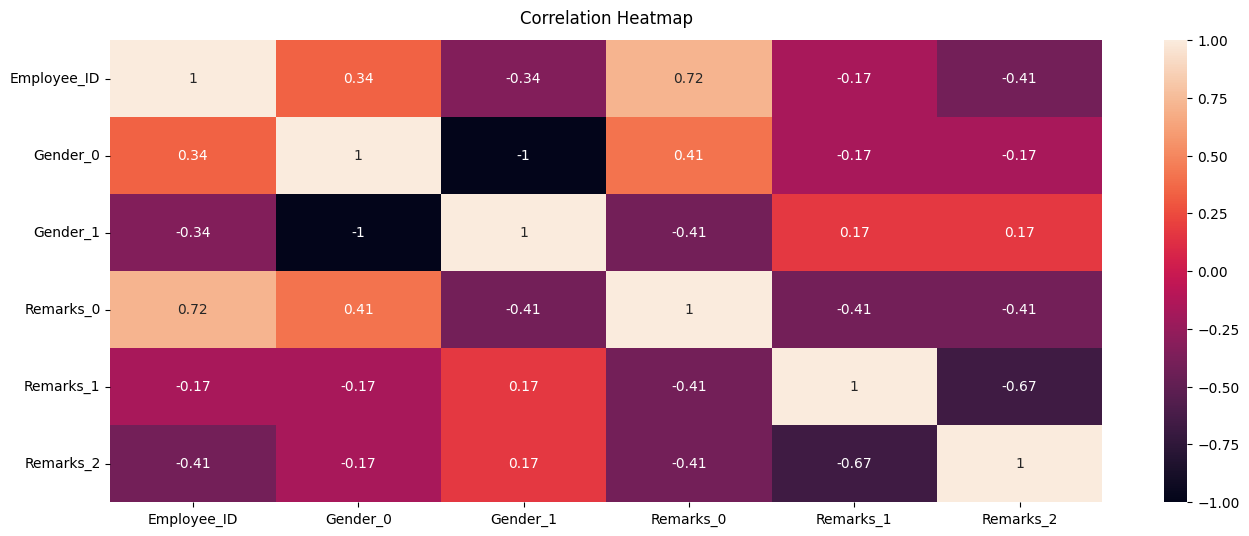

In [54]:
import seaborn as sns
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


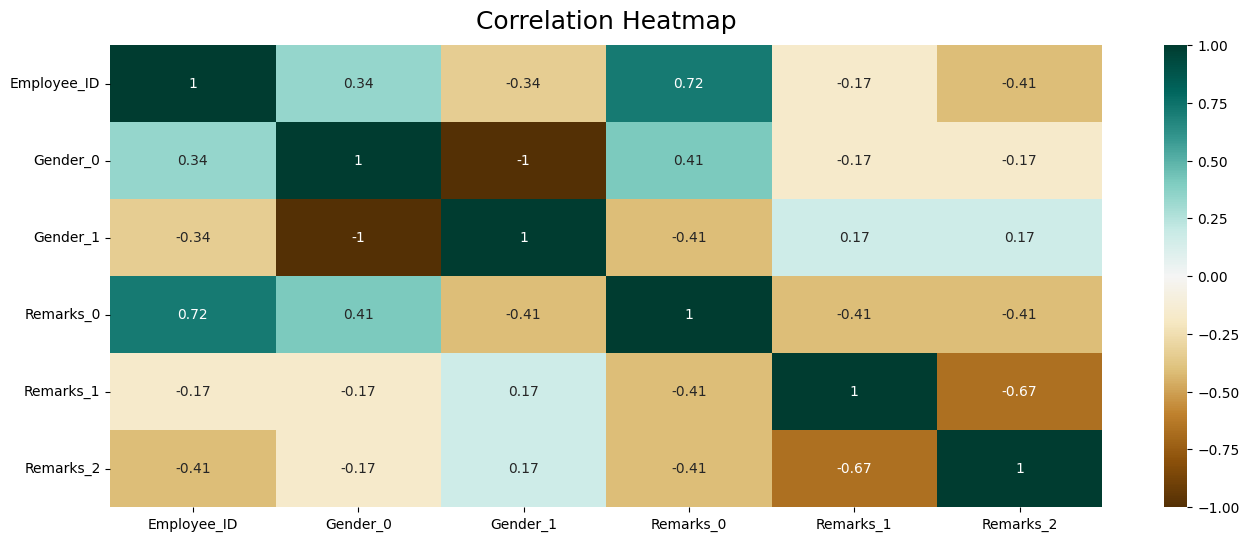

In [55]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

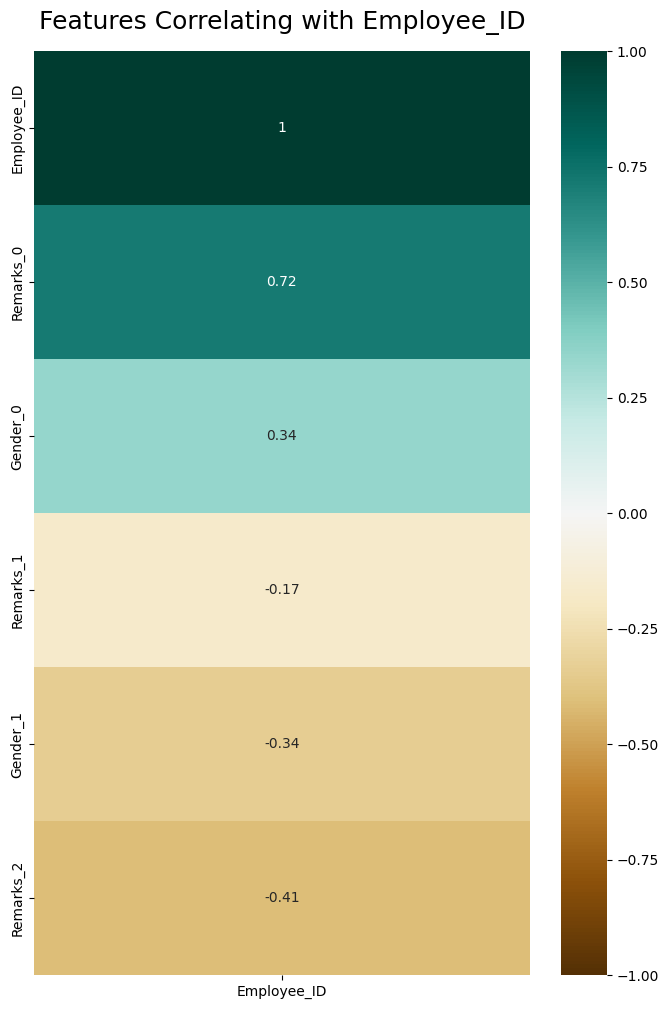

In [57]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Employee_ID']].sort_values(by='Employee_ID', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Employee_ID', fontdict={'fontsize':18}, pad=16);

https://medium.com/@hammad.ai/3-ways-to-detect-multicollinearity-in-your-dataset-6ee1776b7aa8#:~:text=Scatter%2Dplots&text=This%20will%20help%20us%20detect%20if%20any%20two%20given%20fields%20are%20correlated.&text=The%20scatter%20plots%20like%20the,collinear%20and%20which%20are%20not.

#What is Multicollinearity?
It is a state of your dataset where 2 or more independent variables are showing signs of high correlation between themselves.

###Now let's break this down …

Assuming we have 2 or more independent variables (also known as predictors) in our dataset, we will further assume that some of them are collinear with each other. This means that if you calculate the Correlation Coefficient of each of them, you will find that the resulting values are either close to +1.0 or -1.0.

#Why Is It A Problem?
Simply because it has potential to distort the outcomes of regression models and compromise the reliability of results.

In a regression problem, our goal is to estimate the dependent variable based on the values of one or more independent variables. Throughout this process, we need to help the model detect which independent variables will help itself to predict/estimate the dependent (target) variable. Within this context, we have 2 perspectives we can see the issue from:

Several independent variables are behaving the same way.
More than one independent variable is trying to predict the outcome of the dependent (target) variable.
Both of these perspectives lead to the same issue, i.e., this situation makes it challenging for us (and the model) to ascertain the distinct impact of each variable on the dependent (target) variable. Therefore, we become unable to account for the individual contributions of these independent variables.

That’s all there is to it.


#Ways To Identify Multicollinearity
1. Heatmaps
If you truly read the above or know what multicollinearity is, you might infer that using a heatmap is one of the possible solutions in your utility belt. Well you are right on the money it is!

In case you are not familiar with what a heatmap is; it is a visual representation of data where values are depicted using colors on a grid. It’s often used to show the relationship between two variables through color intensity, with warmer colors indicating higher values and cooler colors representing lower values. Something like this:



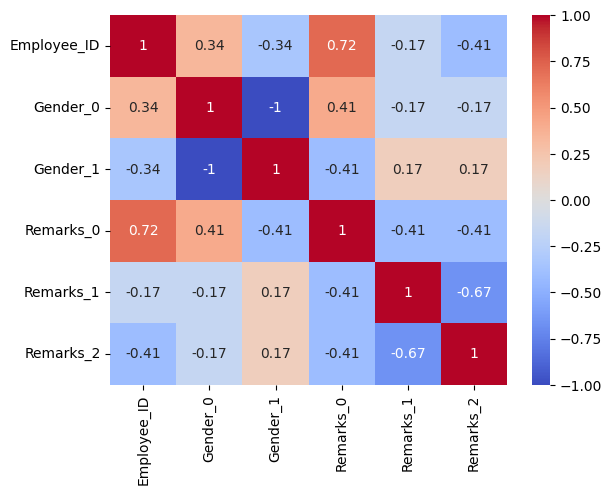

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

##The heatmap you will use would take in correlation coefficient values to plot out the color intensity in each cell.

###pls see the high density color cell.

if co-relation > 0.9, means Multicolinerity present.

#2. Scatter-plots
A scatter plot between any two fields in the dataset can show if the plots tend to converge in a single line or not. This will help us detect if any two given fields are correlated.

But doing this for each individual field is tiresome work. To efficiently perform this, we will follow the approach similar to heatmaps. We will create a table which is constructed in the same way the heatmaps are, but with the exception that each cell will now contain a scatter plot instead of a colored region, like the one below:


The scatter plots like the one shown above will not have those red lines to indicate convergence of data points.

By looking at each of these plots, you can identify which of them are collinear and which are not.

But this method seems less efficient as compared to heatmaps on the grounds of quantitative analysis, **since heatmaps can include correlation coefficient in each cell which help us quantify the multicollinearity for any two fields.**

While not compatible for quantitative analysis, this method is **best suited for judging the quality or the convergence of plots.** The plots may or may not converge in a single line, but the simply taking the correlation coefficient into consideration does not explain any unusual distribution of plots. This is where scatter plots come in handy.

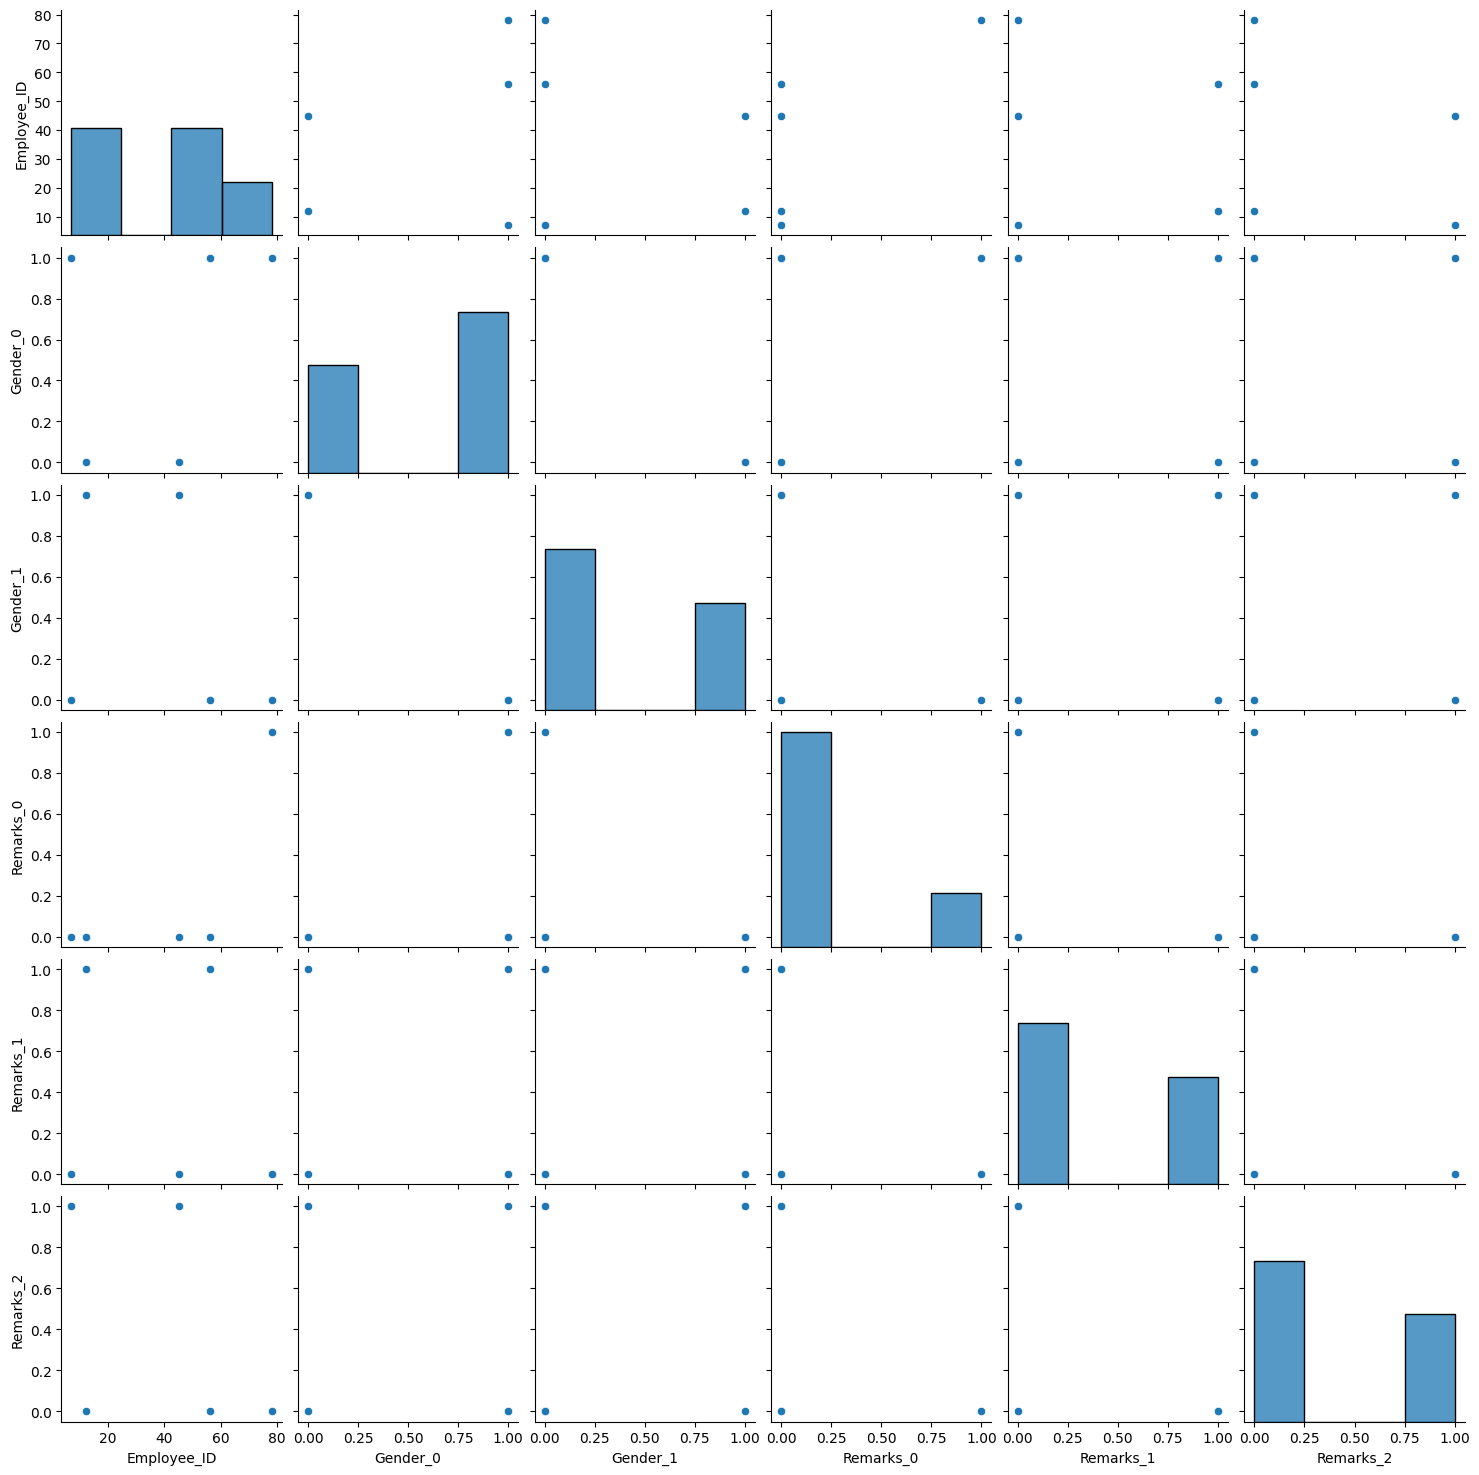

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(df)
plt.show()

#3. Variance Inflation Factor (VIF)
VIF is a measurement of the amount of multicollinearity in a multiple regression model. But do we measure multicollinearity as a whole or on an individual basis?

VIF is just a mathematical tool which tells us how any one independent variable can be explained by a combination of all other variables. If the explainability is high, then the variable under consideration is highly collinear, and we would say that we do not need it.

VIF is simply a score which has a certain threshold. That threshold is set by us, which is traditionally ≥5. But we can set our own if we want. Here is the formula to calculate VIF:


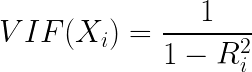

Where;

##i is the current iteration of the variables.

##R^2 is the coefficient of determination.

The way we use this is that we calculate VIF for every independent variable separately, and check individually if the VIF score is greater than the threshold or not.



#Why Does Multicollinearity Occur?
There may or may not be more than one reason why multicollinearity is present in your dataset. Let’s look at some common reasons for that:

#Data Collection Methods
👉 Data collected from similar sources or using similar methods may lead to multicollinearity. For example, if you’re conducting a survey and ask multiple questions that are closely related, the responses may show high correlations.

#Measurement Error
👉 Measurement errors in data can introduce multicollinearity. If two variables are measured with some degree of error, this error can cause them to be correlated.
#Common Scales
👉 Variables measured on similar scales can exhibit multicollinearity. For instance, if you have variables measured in dollars and other variables measured in thousands of dollars, they will likely be highly correlated.
#Time-Series Data
👉 In time-series data, multicollinearity can occur when you include lagged versions of the same variable. For example, including both a variable’s current value and its value from the previous time step can introduce multicollinearity.
#Domain Knowledge
👉 In some cases, researchers intentionally include variables that are known to be highly correlated because they believe these variables are important predictors or because they want to explore their individual contributions.
